In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-v0_8')

In [15]:
file_path = 'Folds5x2_pp.xlsx'

all_sheets = pd.read_excel(file_path, sheet_name=None)
data = pd.concat(all_sheets.values(), ignore_index=True)

print("Размер данных:", data.shape)
print("\nПервые 5 строк данных:")
print(data.head())
print("\nИнформация о данных:")
print(data.info())
print("\nСтатистическое описание:")
print(data.describe())

Размер данных: (47840, 5)

Первые 5 строк данных:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB
None

Статистическое описание:
                 AT             V            AP            RH            PE
count  47840.000000  47840.000000  47840.000000  47840.000000  47840.000000
mean      19.651231     54.305804   1013.259078     73.308978    454.365009
std        7.452162   

In [16]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print(f"Форма массива признаков (X): {X.shape}")
print(f"Форма массива целевой переменной (y): {y.shape}")
print(f"\nНазвания признаков: {data.columns[:-1].tolist()}")
print(f"Целевая переменная: {data.columns[-1]}")

Форма массива признаков (X): (47840, 4)
Форма массива целевой переменной (y): (47840,)

Названия признаков: ['AT', 'V', 'AP', 'RH']
Целевая переменная: PE


In [17]:
test_size = 0.2

indices = np.arange(len(X))
np.random.seed(42)
np.random.shuffle(indices)

split_index = int(len(X) * (1 - test_size))

X_shuffled = X[indices]
y_shuffled = y[indices]

X_train = X_shuffled[:split_index]
X_test = X_shuffled[split_index:]
y_train = y_shuffled[:split_index]
y_test = y_shuffled[split_index:]

print("Разделение завершено:")
print(f"Обучающая выборка: {X_train.shape[0]} примеров")
print(f"Тестовая выборка: {X_test.shape[0]} примеров")
print(f"\nРазмер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")

Разделение завершено:
Обучающая выборка: 38272 примеров
Тестовая выборка: 9568 примеров

Размер X_train: (38272, 4)
Размер X_test: (9568, 4)


In [18]:
print("=== Линейная регрессия ===")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Коэффициенты модели:")
for i, col in enumerate(data.columns[:-1]):
    print(f"  {col}: {lr_model.coef_[i]:.4f}")
print(f"Свободный член (intercept): {lr_model.intercept_:.4f}")

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

print("\nКачество модели на обучающей выборке:")
print(f"  R^2: {r2_score(y_train, y_pred_train):.4f}")
print(f"  MSE: {mean_squared_error(y_train, y_pred_train):.4f}")

print("Качество модели на тестовой выборке:")
print(f"  R^2: {r2_score(y_test, y_pred_test):.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_test):.4f}")

=== Линейная регрессия ===
Коэффициенты модели:
  AT: -1.9728
  V: -0.2352
  AP: 0.0644
  RH: -0.1577
Свободный член (intercept): 452.1806

Качество модели на обучающей выборке:
  R^2: 0.9287
  MSE: 20.7535
Качество модели на тестовой выборке:
  R^2: 0.9287
  MSE: 20.8256


=== Полиномиальная регрессия для всех признаков ===


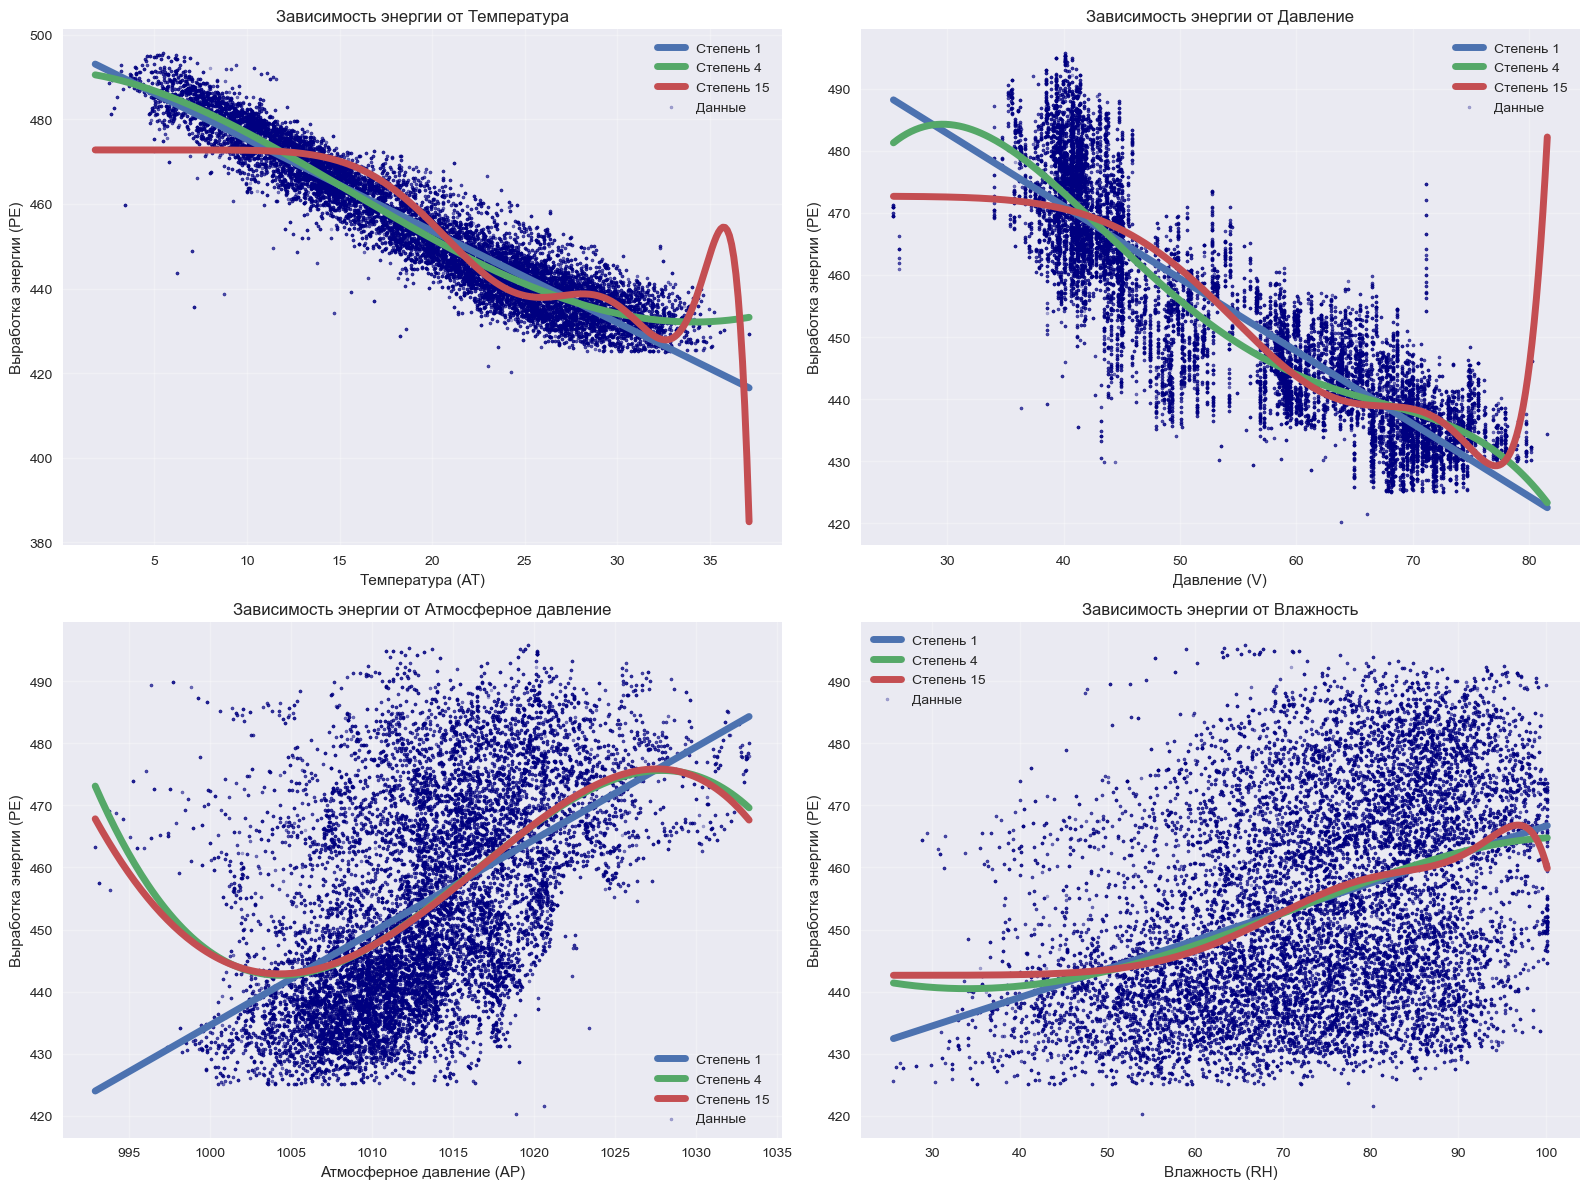


СРАВНЕНИЕ MSE ДЛЯ ВСЕХ ПРИЗНАКОВ
Признак                   Степень  MSE train    MSE test     Разница   
--------------------------------------------------------------------------------
Температура (AT)          1        29.3846      29.6227       +0.2380
                          4        25.6467      25.7159       +0.0692
                          15       48.0414      46.5907       -1.4506
--------------------------------------------------------------------------------
Давление (V)              1        70.9755      70.6713       -0.3042
                          4        64.2987      63.6416       -0.6571
                          15       76.3831      75.7187       -0.6644
--------------------------------------------------------------------------------
Атмосферное давление (AP) 1        212.6472     214.2782      +1.6310
                          4        204.3573     205.5964      +1.2391
                          15       204.5422     205.7820      +1.2398
---------------------

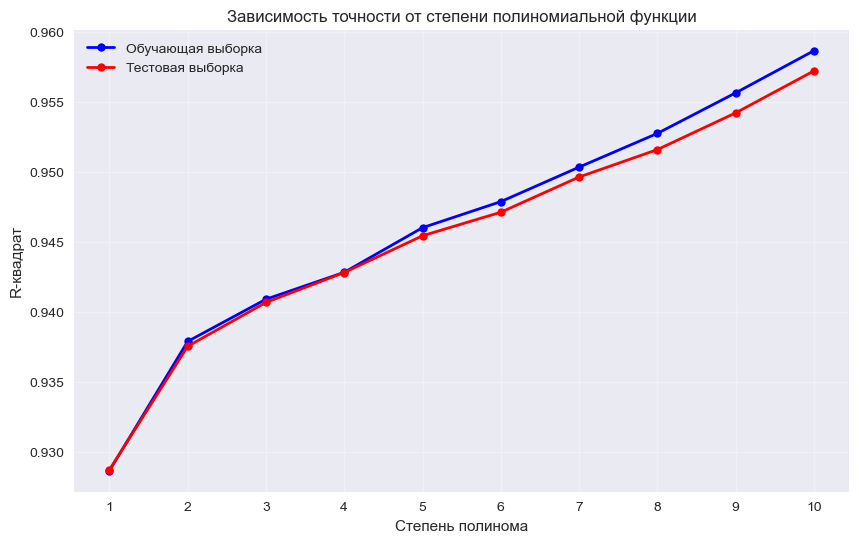

Анализ переобучения:
Степень 1: Train R^2 = 0.9287, Test R^2 = 0.9287
Степень 2: Train R^2 = 0.9379, Test R^2 = 0.9376
Степень 3: Train R^2 = 0.9409, Test R^2 = 0.9407
Степень 4: Train R^2 = 0.9428, Test R^2 = 0.9428
Степень 5: Train R^2 = 0.9460, Test R^2 = 0.9454
Степень 6: Train R^2 = 0.9479, Test R^2 = 0.9471
Степень 7: Train R^2 = 0.9503, Test R^2 = 0.9496
Степень 8: Train R^2 = 0.9528, Test R^2 = 0.9516
Степень 9: Train R^2 = 0.9556, Test R^2 = 0.9542
Степень 10: Train R^2 = 0.9587, Test R^2 = 0.9572


In [48]:
print("=== Полиномиальная регрессия для всех признаков ===")

feature_names = ['Температура (AT)', 'Давление (V)', 'Атмосферное давление (AP)', 'Влажность (RH)']
feature_columns = [0, 1, 2, 3]
degrees = [1, 4, 15]

plt.figure(figsize=(16, 12))

results = {}

for feature_idx, feature_name in zip(feature_columns, feature_names):
    X_train_single = X_train[:, feature_idx].reshape(-1, 1)
    X_test_single = X_test[:, feature_idx].reshape(-1, 1)
    
    sort_idx = np.argsort(X_train_single.ravel())
    X_train_sorted = X_train_single[sort_idx]
    y_train_sorted = y_train[sort_idx]
    
    plt.subplot(2, 2, feature_idx + 1)
    
    feature_results = []
    
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train_single)
        X_test_poly = poly.transform(X_test_single)
        
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, y_train)
        
        y_pred_train = poly_model.predict(X_train_poly)
        y_pred_test = poly_model.predict(X_test_poly)
        
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        feature_results.append((mse_train, mse_test))
        
        X_plot = np.linspace(X_train_single.min(), X_train_single.max(), 300).reshape(-1, 1)
        X_plot_poly = poly.transform(X_plot)
        y_plot = poly_model.predict(X_plot_poly)
        
        plt.plot(X_plot, y_plot, linewidth=5, label=f'Степень {degree}')
    
    results[feature_name] = feature_results
    
    plt.scatter(X_train_sorted, y_train_sorted, color='navy', s=5, alpha=0.3, label="Данные")
    
    plt.xlabel(feature_name)
    plt.ylabel("Выработка энергии (PE)")
    plt.title(f"Зависимость энергии от {feature_name.split(' (')[0]}")
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("СРАВНЕНИЕ MSE ДЛЯ ВСЕХ ПРИЗНАКОВ")
print("="*80)
print(f"{'Признак':<25} {'Степень':<8} {'MSE train':<12} {'MSE test':<12} {'Разница':<10}")
print("-"*80)

for feature_name in feature_names:
    feature_results = results[feature_name]
    for i, degree in enumerate(degrees):
        mse_train, mse_test = feature_results[i]
        difference = mse_test - mse_train
        
        print(f"{feature_name if i == 0 else '':<25} {degree:<8} {mse_train:<12.4f} {mse_test:<12.4f} {difference:>+8.4f}")
    print("-" * 80)

print("\n=== Зависимость точности от степени полинома ===")

degrees_range = range(1, 11)
train_scores = []
test_scores = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for degree in degrees_range:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    y_pred_train = poly_model.predict(X_train_poly)
    y_pred_test = poly_model.predict(X_test_poly)
    
    train_scores.append(r2_score(y_train, y_pred_train))
    test_scores.append(r2_score(y_test, y_pred_test))

plt.figure(figsize=(10, 6))
plt.plot(degrees_range, train_scores, 'bo-', label='Обучающая выборка', linewidth=2, markersize=6)
plt.plot(degrees_range, test_scores, 'ro-', label='Тестовая выборка', linewidth=2, markersize=6)
plt.xlabel('Степень полинома')
plt.ylabel('R-квадрат')
plt.title('Зависимость точности от степени полиномиальной функции')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(degrees_range)
plt.show()

print("Анализ переобучения:")
for i, degree in enumerate(degrees_range):
    print(f"Степень {degree}: Train R^2 = {train_scores[i]:.4f}, Test R^2 = {test_scores[i]:.4f}")

=== Ridge и Lasso регуляризация ===
Подбор параметров регуляризации...


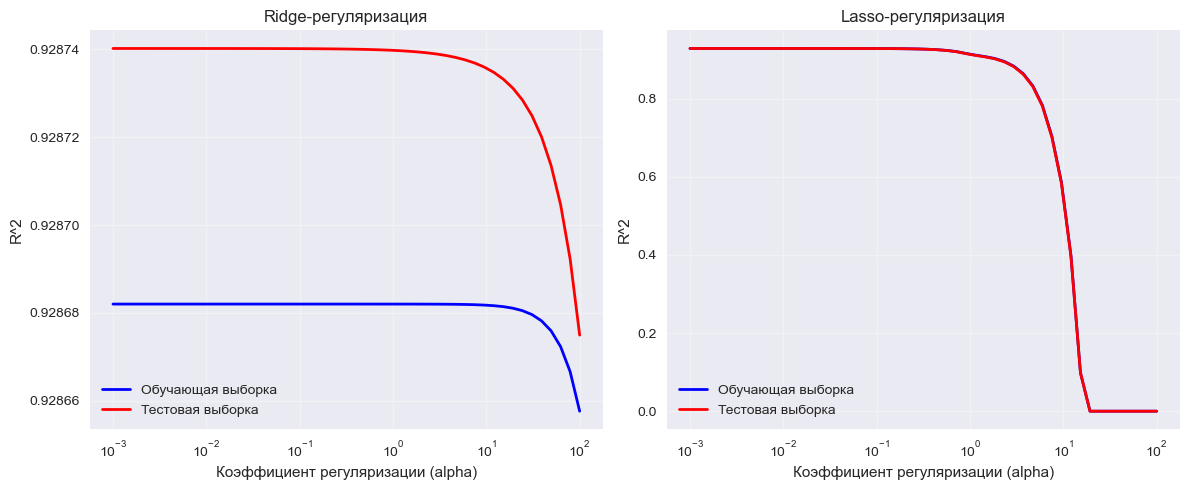

Результаты подбора параметров:
Ridge - лучший alpha: 0.0010, R^2: 0.9287
Lasso - лучший alpha: 0.0010, R^2: 0.9287


In [47]:
print("=== Ridge и Lasso регуляризация ===")

alphas = np.logspace(-3, 2, 50)

ridge_train_scores, ridge_test_scores = [], []
lasso_train_scores, lasso_test_scores = [], []

print("Подбор параметров регуляризации...")
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_train_ridge = ridge_model.predict(X_train_scaled)
    y_pred_test_ridge = ridge_model.predict(X_test_scaled)
    ridge_train_scores.append(r2_score(y_train, y_pred_train_ridge))
    ridge_test_scores.append(r2_score(y_test, y_pred_test_ridge))
    
    lasso_model = Lasso(alpha=alpha, random_state=42, max_iter=5000)
    lasso_model.fit(X_train_scaled, y_train)
    y_pred_train_lasso = lasso_model.predict(X_train_scaled)
    y_pred_test_lasso = lasso_model.predict(X_test_scaled)
    lasso_train_scores.append(r2_score(y_train, y_pred_train_lasso))
    lasso_test_scores.append(r2_score(y_test, y_pred_test_lasso))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogx(alphas, ridge_train_scores, 'b-', label='Обучающая выборка', linewidth=2)
plt.semilogx(alphas, ridge_test_scores, 'r-', label='Тестовая выборка', linewidth=2)
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('R^2')
plt.title('Ridge-регуляризация')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.semilogx(alphas, lasso_train_scores, 'b-', label='Обучающая выборка', linewidth=2)
plt.semilogx(alphas, lasso_test_scores, 'r-', label='Тестовая выборка', linewidth=2)
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('R^2')
plt.title('Lasso-регуляризация')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

best_alpha_ridge = alphas[np.argmax(ridge_test_scores)]
best_alpha_lasso = alphas[np.argmax(lasso_test_scores)]

print("Результаты подбора параметров:")
print(f"Ridge - лучший alpha: {best_alpha_ridge:.4f}, R^2: {np.max(ridge_test_scores):.4f}")
print(f"Lasso - лучший alpha: {best_alpha_lasso:.4f}, R^2: {np.max(lasso_test_scores):.4f}")